In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
predikce_df = pd.read_csv('datasets/merge_data_v3.csv', sep=';')

In [3]:
predikce_df.head()

race_index  year                  race  driverId  F2_champion  \
0           1  1995  Brazilian Grand Prix        57            0   
1           1  1995  Brazilian Grand Prix        87            0   
2           1  1995  Brazilian Grand Prix        71            0   
3           1  1995  Brazilian Grand Prix        14            0   
4           1  1995  Brazilian Grand Prix        77            0   

   Former_F1_World_Champion Nationality  home_race  constructorId  \
0                         0     Finnish          0              1   
1                         0     British          0              1   
2                         1     British          0              3   
3                         0     British          0              3   
4                         0    Austrian          0              6   

  engine_manufacturer  ... Driver_Issue  Lapped  Number_Of_Stops  \
0            Mercedes  ...          0.0     1.0         2.107465   
1            Mercedes  ...          1.0     1.0         2.107465   
2             Renault  ...          0.0     1.0         2.107465   
3             Renault  ...          0.0     0.0         3.000000   
4             Ferrari  ...          0.0     0.0         2.000000   

  Total_time_in_pits  Avg_time_in_pits  Weather_Conditions_Dry  \
0           54.14118         26.069149                     1.0   
1           54.14118         26.069149                     1.0   
2           54.14118         26.069149                     1.0   
3           88.95800         29.652667                     1.0   
4           56.85000         28.425000                     1.0   

   Weather_Conditions_Rain  Circuit_Type_Permanent_Race_Track   \
0                      0.0                                 0.0   
1                      0.0                                 0.0   
2                      0.0                                 0.0   
3                      0.0                                 0.0   
4                      0.0                                 0.0   

   Circuit_Type_Street_Circuit  Circuit_Type_Street_Circuit   
0                          0.0                           0.0  
1                          0.0                           0.0  
2                          0.0                           0.0  
3                          0.0                           0.0  
4                          0.0                           0.0  

[5 rows x 33 columns]

In [4]:
predikce_df.tail()

race_index  year                race  driverId  F2_champion  \
11230         527  2023  Belgian Grand Prix       807            1   
11231         527  2023  Belgian Grand Prix       817            0   
11232         527  2023  Belgian Grand Prix       852            0   
11233         527  2023  Belgian Grand Prix       842            1   
11234         527  2023  Belgian Grand Prix       839            0   

       Former_F1_World_Champion Nationality  home_race  constructorId  \
11230                         0      German          0            210   
11231                         0  Australian          0            213   
11232                         0    Japanese          0            213   
11233                         0      French          0            214   
11234                         0      French          0            214   

      engine_manufacturer  ... Driver_Issue  Lapped  Number_Of_Stops  \
11230             Ferrari  ...          NaN     NaN              NaN   
11231               Honda  ...          NaN     NaN              NaN   
11232               Honda  ...          NaN     NaN              NaN   
11233             Renault  ...          NaN     NaN              NaN   
11234             Renault  ...          NaN     NaN              NaN   

      Total_time_in_pits  Avg_time_in_pits  Weather_Conditions_Dry  \
11230                NaN               NaN                     NaN   
11231                NaN               NaN                     NaN   
11232                NaN               NaN                     NaN   
11233                NaN               NaN                     NaN   
11234                NaN               NaN                     NaN   

       Weather_Conditions_Rain  Circuit_Type_Permanent_Race_Track   \
11230                      NaN                                 NaN   
11231                      NaN                                 NaN   
11232                      NaN                                 NaN   
11233                      NaN                                 NaN   
11234                      NaN                                 NaN   

       Circuit_Type_Street_Circuit  Circuit_Type_Street_Circuit   
11230                          NaN                           NaN  
11231                          NaN                           NaN  
11232                          NaN                           NaN  
11233                          NaN                           NaN  
11234                          NaN                           NaN  

[5 rows x 33 columns]

In [7]:
constructor_results = pd.read_csv('datasets/constructor_results.csv')
constructor_standings_df.head()

constructorStandingsId  raceId  constructorId  points  position  \
0                       1      18              1    14.0         1   
1                       2      18              2     8.0         3   
2                       3      18              3     9.0         2   
3                       4      18              4     5.0         4   
4                       5      18              5     2.0         5   

  positionText  wins  
0            1     1  
1            3     0  
2            2     0  
3            4     0  
4            5     0

In [8]:
constructors_df = pd.read_csv('datasets/constructors.csv')
constructors_df.head()


constructorId constructorRef        name nationality  \
0              1        mclaren     McLaren     British   
1              2     bmw_sauber  BMW Sauber      German   
2              3       williams    Williams     British   
3              4        renault     Renault      French   
4              5     toro_rosso  Toro Rosso     Italian   

                                                 url  
0               http://en.wikipedia.org/wiki/McLaren  
1            http://en.wikipedia.org/wiki/BMW_Sauber  
2  http://en.wikipedia.org/wiki/Williams_Grand_Pr...  
3  http://en.wikipedia.org/wiki/Renault_in_Formul...  
4   http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso

In [10]:
drivers_df = pd.read_csv('datasets/drivers.csv')
drivers_df.head()

driverId   driverRef number code  forename     surname         dob  \
0         1    hamilton     44  HAM     Lewis    Hamilton  1985-01-07   
1         2    heidfeld     \N  HEI      Nick    Heidfeld  1977-05-10   
2         3     rosberg      6  ROS      Nico     Rosberg  1985-06-27   
3         4      alonso     14  ALO  Fernando      Alonso  1981-07-29   
4         5  kovalainen     \N  KOV    Heikki  Kovalainen  1981-10-19   

  nationality                                             url  
0     British     http://en.wikipedia.org/wiki/Lewis_Hamilton  
1      German      http://en.wikipedia.org/wiki/Nick_Heidfeld  
2      German       http://en.wikipedia.org/wiki/Nico_Rosberg  
3     Spanish    http://en.wikipedia.org/wiki/Fernando_Alonso  
4     Finnish  http://en.wikipedia.org/wiki/Heikki_Kovalainen

In [15]:
results_df = pd.read_csv('datasets/results.csv')
results_df.head()

resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  laps         time milliseconds  \
0            1              1    10.0    58  1:34:50.616      5690616   
1            2              2     8.0    58       +5.478      5696094   
2            3              3     6.0    58       +8.163      5698779   
3            4              4     5.0    58      +17.181      5707797   
4            5              5     4.0    58      +18.014      5708630   

  fastestLap rank fastestLapTime fastestLapSpeed  statusId  
0         39    2       1:27.452         218.300         1  
1         41    3       1:27.739         217.586         1  
2         41    5       1:28.090         216.719         1  
3         58    7       1:28.603         215.464         1  
4         43    1       1:27.418         218.385         1

In [19]:
predikce_df.tail()

race_index  year                race  driverId  F2_champion  \
11230         527  2023  Belgian Grand Prix       807            1   
11231         527  2023  Belgian Grand Prix       817            0   
11232         527  2023  Belgian Grand Prix       852            0   
11233         527  2023  Belgian Grand Prix       842            1   
11234         527  2023  Belgian Grand Prix       839            0   

       Former_F1_World_Champion Nationality  home_race  constructorId  \
11230                         0      German          0            210   
11231                         0  Australian          0            213   
11232                         0    Japanese          0            213   
11233                         0      French          0            214   
11234                         0      French          0            214   

      engine_manufacturer  ... Driver_Issue  Lapped  Number_Of_Stops  \
11230             Ferrari  ...          NaN     NaN              NaN   
11231               Honda  ...          NaN     NaN              NaN   
11232               Honda  ...          NaN     NaN              NaN   
11233             Renault  ...          NaN     NaN              NaN   
11234             Renault  ...          NaN     NaN              NaN   

      Total_time_in_pits  Avg_time_in_pits  Weather_Conditions_Dry  \
11230                NaN               NaN                     NaN   
11231                NaN               NaN                     NaN   
11232                NaN               NaN                     NaN   
11233                NaN               NaN                     NaN   
11234                NaN               NaN                     NaN   

       Weather_Conditions_Rain  Circuit_Type_Permanent_Race_Track   \
11230                      NaN                                 NaN   
11231                      NaN                                 NaN   
11232                      NaN                                 NaN   
11233                      NaN                                 NaN   
11234                      NaN                                 NaN   

       Circuit_Type_Street_Circuit  Circuit_Type_Street_Circuit   
11230                          NaN                           NaN  
11231                          NaN                           NaN  
11232                          NaN                           NaN  
11233                          NaN                           NaN  
11234                          NaN                           NaN  

[5 rows x 33 columns]

In [20]:
predikce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11235 entries, 0 to 11234
Data columns (total 33 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   race_index                               11235 non-null  int64  
 1   year                                     11235 non-null  int64  
 2   race                                     11235 non-null  object 
 3   driverId                                 11235 non-null  int64  
 4   F2_champion                              11235 non-null  int64  
 5   Former_F1_World_Champion                 11235 non-null  int64  
 6   Nationality                              11235 non-null  object 
 7   home_race                                11235 non-null  int64  
 8   constructorId                            11235 non-null  int64  
 9   engine_manufacturer                      11235 non-null  object 
 10  constructor_nationality                  11235

# Exploratory Data Analysis

## PŘEDPRACOVÁNÍ DAT 
## Ověření duplicity, chybějících hodnot, kontrola unikátnosti

In [21]:

# 1. Nejprve seřadíme data podle jezdce a závodu (důležité pro rolling)
predikce_df = predikce_df.sort_values(by=['driverId', 'race_index'])

# 2. Rolling součet bodů jezdce za posledních 5 závodů
predikce_df['rolling_driver_points_last_5'] = (
    predikce_df.groupby('driverId')['points_in_previous_race']
    .transform(lambda x: x.shift(1).rolling(window=5, min_periods=1).sum())
)

# 4. Relativní forma - poměr k max v závodě
predikce_df['driver_form_ratio'] = (
    predikce_df['rolling_driver_points_last_5'] /
    predikce_df.groupby('race_index')['rolling_driver_points_last_5'].transform('max')
)

# 5. Rozdíl oproti průměru v závodě
predikce_df['driver_vs_avg'] = (
    predikce_df['rolling_driver_points_last_5'] -
    predikce_df.groupby('race_index')['rolling_driver_points_last_5'].transform('mean')
)



# --- Kontrola ---
print("\n✅ Feature engineering hotov.")
print(predikce_df[[
    'year', 'race_index', 'driverId',
    'rolling_driver_points_last_5', 'driver_form_ratio', 'driver_vs_avg'
]].sort_values(by='rolling_driver_points_last_5', ascending=False).head(10))



✅ Feature engineering hotov.
       year  race_index  driverId  rolling_driver_points_last_5  \
7730   2015         354         1                         143.0   
7789   2015         357         1                         133.0   
7750   2015         355         1                         133.0   
7770   2015         356         1                         133.0   
7810   2015         358         1                         133.0   
11221  2023         527       830                         128.0   
11201  2023         526       830                         128.0   
10902  2022         511       830                         127.0   
7231   2013         331        20                         125.0   
7253   2013         332        20                         125.0   

       driver_form_ratio  driver_vs_avg  
7730                 1.0     106.312500  
7789                 1.0     102.800000  
7750                 1.0     103.550000  
7770                 1.0     103.050000  
7810                 1

In [22]:


# Vyber jen číselné sloupce (int + float)
numeric_df = predikce_df.select_dtypes(include=['int64', 'float64'])

# Vypočítej korelační matici
correlation_matrix = numeric_df.corr()

# Zobraz korelační tabulku
print(correlation_matrix)

correlation_matrix.to_csv('korelace.csv')



                                           race_index          year  driverId  \
race_index                               1.000000e+00  9.986326e-01  0.670363   
year                                     9.986326e-01  1.000000e+00  0.661688   
driverId                                 6.703626e-01  6.616877e-01  1.000000   
F2_champion                              2.303224e-01  2.334639e-01  0.068069   
Former_F1_World_Champion                 7.639195e-02  8.064503e-02 -0.304941   
home_race                               -4.510865e-02 -4.615754e-02 -0.042156   
constructorId                            3.778823e-01  3.748689e-01  0.244509   
starting_grid_position                  -6.370712e-02 -6.223471e-02  0.103855   
points_in_previous_race                  2.756540e-01  2.762226e-01  0.015598   
laps_in_previous_race                    1.437563e-01  1.450485e-01  0.063659   
race_win                                 6.391220e-03  6.255708e-03 -0.083832   
new_index                   

In [71]:
import plotly.express as px
import numpy as np
import pandas as pd

# Vytvoř kopii korelační matice
lower_triangle = correlation_matrix.copy()

# Nahradíme horní trojúhelník hodnotami NaN
upper_mask = np.triu(np.ones_like(lower_triangle, dtype=bool), k=1)
lower_triangle.values[upper_mask] = np.nan

fig.update_layout(
    title="Korelační matice (dolní trojúhelník, korelace > 0.7)",
    width=900, height=800,
    xaxis_tickangle=45,
    xaxis_tickfont=dict(size=10),
    yaxis_tickfont=dict(size=10)
)
fig.show()


In [24]:
predikce_df = predikce_df.drop(columns=['Circuit_Type_Street_Circuit', 'new_index', 'Nationality', 'Mechanical', 'Driver_Issue', 'Lapped', 'constructorId_points_at_stage_of_season'])

In [25]:

predikce_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11235 entries, 4396 to 11217
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   race_index                          11235 non-null  int64  
 1   year                                11235 non-null  int64  
 2   race                                11235 non-null  object 
 3   driverId                            11235 non-null  int64  
 4   F2_champion                         11235 non-null  int64  
 5   Former_F1_World_Champion            11235 non-null  int64  
 6   home_race                           11235 non-null  int64  
 7   constructorId                       11235 non-null  int64  
 8   engine_manufacturer                 11235 non-null  object 
 9   constructor_nationality             11235 non-null  object 
 10  starting_grid_position              11235 non-null  int64  
 11  points_in_previous_race             10921 n

In [26]:
missing_data = predikce_df.isna().mean().sort_values(ascending=False)
if missing_data.sum():
    print(missing_data[missing_data > 0] * 100)
else:
    print('None')

points_in_previous_race               2.794838
fastest_lap_from_last_race            2.794838
Number_Of_Stops                       2.794838
Circuit_Type_Permanent_Race_Track     2.794838
Circuit_Type_Street_Circuit           2.794838
Avg_time_in_pits                      2.794838
Weather_Conditions_Dry                2.794838
Weather_Conditions_Rain               2.794838
Total_time_in_pits                    2.794838
races_with_each_team_since_1995       2.794838
laps_in_previous_race                 2.794838
age                                   2.794838
driver_form_ratio                     2.732532
driver_vs_avg                         2.732532
rolling_driver_points_last_5          2.732532
dtype: float64


Chybějící hodnoty ve sloupcích (%):
points_in_previous_race               2.79
fastest_lap_from_last_race            2.79
Number_Of_Stops                       2.79
Circuit_Type_Permanent_Race_Track     2.79
Circuit_Type_Street_Circuit           2.79
Avg_time_in_pits                      2.79
Weather_Conditions_Dry                2.79
Weather_Conditions_Rain               2.79
Total_time_in_pits                    2.79
races_with_each_team_since_1995       2.79
laps_in_previous_race                 2.79
age                                   2.79
driver_form_ratio                     2.73
driver_vs_avg                         2.73
rolling_driver_points_last_5          2.73
dtype: float64


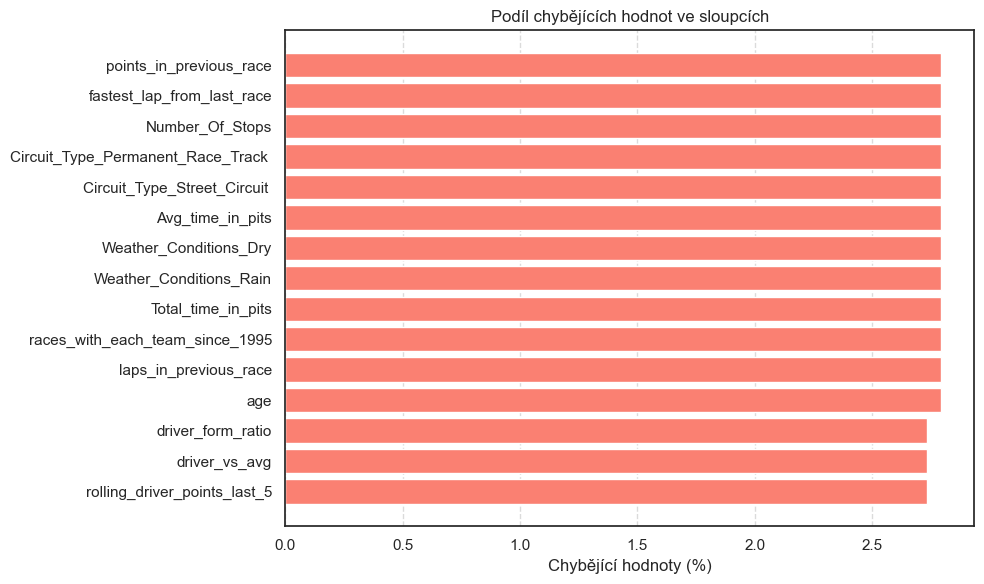

In [27]:
# Spočítá podíl chybějících hodnot (NaN) pro každý sloupec
missing_data_ratio = predikce_df.isna().mean().sort_values(ascending=False)

# Filtrujeme pouze ty sloupce, kde něco chybí
missing_data_present = missing_data_ratio[missing_data_ratio > 0]

if not missing_data_present.empty:
    print("Chybějící hodnoty ve sloupcích (%):")
    print((missing_data_present * 100).round(2))

    # Vykreslení sloupcového grafu
    plt.figure(figsize=(10, 6))
    plt.barh(missing_data_present.index, missing_data_present.values * 100, color='salmon')
    plt.xlabel("Chybějící hodnoty (%)")
    plt.title("Podíl chybějících hodnot ve sloupcích")
    plt.gca().invert_yaxis()  # Nejvíce chyb nahoře
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('nulove_hodnoty.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("Žádné chybějící hodnoty.")

In [28]:
# 1. Najdi sloupce s chybějícími hodnotami
columns_with_nan = predikce_df.columns[predikce_df.isna().any()]

# 2. Přetypuj object/string sloupce na numerické (kde je to možné)
for col in columns_with_nan:
    if predikce_df[col].dtype == 'object' or pd.api.types.is_string_dtype(predikce_df[col]):
        print(f"Přetypovávám {col} (text ➜ numeric pokud to jde)")
        predikce_df[col] = pd.to_numeric(predikce_df[col], errors='coerce')

# 3. Náhrada NaN podle typu dat
for col in columns_with_nan:
    if pd.api.types.is_numeric_dtype(predikce_df[col]):
        # Pro číselné hodnoty doplňuj mediánem (lepší než průměr)
        median_val = predikce_df[col].median()
        predikce_df[col] = predikce_df[col].fillna(median_val)
        print(f"Doplněno NaN v {col} mediánem: {median_val:.2f}")
    else:
        # Pro kategorické hodnoty doplňuj nejčastější hodnotou nebo 'missing'
        mode_val = predikce_df[col].mode()
        if not mode_val.empty:
            fill_val = mode_val[0]
        else:
            fill_val = 'missing'
        predikce_df[col] = predikce_df[col].fillna(fill_val)
        print(f"Doplněno NaN v {col} hodnotou: {fill_val}")

# 4. Sloupce, které chceme zaokrouhlit a převést na celé číslo
int_columns = [
    'laps_in_previous_race', 'points_in_previous_race',
    'fastest_lap_from_last_race', 'Lapped', 'Mechanical', 'Driver_Issue',
    'Number_Of_Stops', 'Total_time_in_pits', 'Avg_time_in_pits',
    'races_with_each_team_since_1995', 'Circuit_Type_Street_Circuit',
    'Weather_Conditions_Dry', 'Weather_Conditions_Rain', 'age'
]

# 5. Zaokrouhlení a převod na celé číslo
for col in int_columns:
    if col in predikce_df.columns and pd.api.types.is_numeric_dtype(predikce_df[col]):
        predikce_df[col] = predikce_df[col].round().astype('Int64')

# 6. Kontrola zbývajících NaN
remaining_nans = predikce_df.isna().sum()
remaining_nans = remaining_nans[remaining_nans > 0]

if not remaining_nans.empty:
    print("\n⚠️ Zbývající chybějící hodnoty:")
    print(remaining_nans)
else:
    print("\n✅ Všechny NaN hodnoty byly úspěšně doplněny a data připravena.")



Přetypovávám fastest_lap_from_last_race (text ➜ numeric pokud to jde)
Doplněno NaN v points_in_previous_race mediánem: 0.00
Doplněno NaN v fastest_lap_from_last_race mediánem: 88007.00
Doplněno NaN v laps_in_previous_race mediánem: 56.00
Doplněno NaN v age mediánem: 27.00
Doplněno NaN v races_with_each_team_since_1995 mediánem: 22.00
Doplněno NaN v Number_Of_Stops mediánem: 2.00
Doplněno NaN v Total_time_in_pits mediánem: 54.14
Doplněno NaN v Avg_time_in_pits mediánem: 26.07
Doplněno NaN v Weather_Conditions_Dry mediánem: 1.00
Doplněno NaN v Weather_Conditions_Rain mediánem: 0.00
Doplněno NaN v Circuit_Type_Permanent_Race_Track  mediánem: 1.00
Doplněno NaN v Circuit_Type_Street_Circuit  mediánem: 0.00
Doplněno NaN v rolling_driver_points_last_5 mediánem: 6.00
Doplněno NaN v driver_form_ratio mediánem: 0.10
Doplněno NaN v driver_vs_avg mediánem: -5.45

✅ Všechny NaN hodnoty byly úspěšně doplněny a data připravena.


In [29]:
print(predikce_df.columns.tolist())

['race_index', 'year', 'race', 'driverId', 'F2_champion', 'Former_F1_World_Champion', 'home_race', 'constructorId', 'engine_manufacturer', 'constructor_nationality', 'starting_grid_position', 'points_in_previous_race', 'fastest_lap_from_last_race', 'laps_in_previous_race', 'race_win', 'driver_points_at_stage_of_season', 'age', 'years_in_f1', 'races_with_each_team_since_1995', 'Number_Of_Stops', 'Total_time_in_pits', 'Avg_time_in_pits', 'Weather_Conditions_Dry', 'Weather_Conditions_Rain', 'Circuit_Type_Permanent_Race_Track ', 'Circuit_Type_Street_Circuit ', 'rolling_driver_points_last_5', 'driver_form_ratio', 'driver_vs_avg']


In [30]:
##Vidíme, že kvalita dat z pohledu chybějících hodnot je opravdu vysoká. V případě, že by nějaký sloupec měl vyšší hodnoty, tak bychom použili příkaz drop('řádky, které bychom chtěli vyhodit'. V našem případě to dělat nebudeme, jelikož si myslím, že je to zbytečné.
##zkusime ale snížit, nebo až odstranit počet chybějících hodnot

In [31]:
missing_data = predikce_df.isna().mean().sort_values(ascending=False)
if missing_data.sum():
    print(missing_data[missing_data > 0] * 100)
else:
    print('None')

None


In [32]:
duplicity = predikce_df[predikce_df.duplicated()]
print(duplicity)

Empty DataFrame
Columns: [race_index, year, race, driverId, F2_champion, Former_F1_World_Champion, home_race, constructorId, engine_manufacturer, constructor_nationality, starting_grid_position, points_in_previous_race, fastest_lap_from_last_race, laps_in_previous_race, race_win, driver_points_at_stage_of_season, age, years_in_f1, races_with_each_team_since_1995, Number_Of_Stops, Total_time_in_pits, Avg_time_in_pits, Weather_Conditions_Dry, Weather_Conditions_Rain, Circuit_Type_Permanent_Race_Track , Circuit_Type_Street_Circuit , rolling_driver_points_last_5, driver_form_ratio, driver_vs_avg]
Index: []

[0 rows x 29 columns]


Počet duplicitních řádků: race_index                              0
year                                    0
race                                    0
driverId                                0
F2_champion                             0
Former_F1_World_Champion                0
home_race                               0
constructorId                           0
engine_manufacturer                     0
constructor_nationality                 0
starting_grid_position                  0
points_in_previous_race                 0
fastest_lap_from_last_race              0
laps_in_previous_race                   0
race_win                                0
driver_points_at_stage_of_season      0.0
age                                     0
years_in_f1                             0
races_with_each_team_since_1995         0
Number_Of_Stops                         0
Total_time_in_pits                      0
Avg_time_in_pits                        0
Weather_Conditions_Dry                  0
Weather_

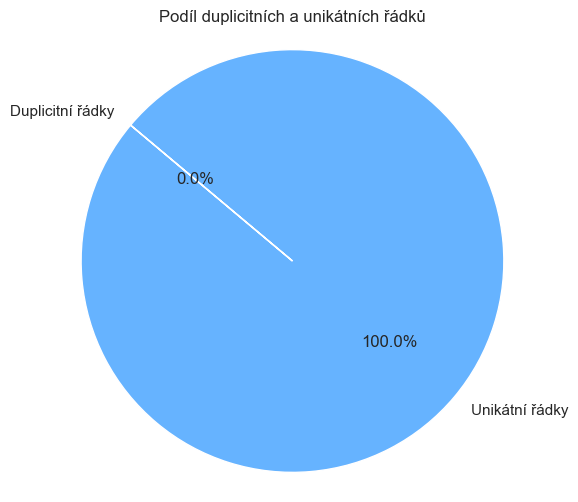

In [33]:
pocet_duplikatu = duplicity.sum()
print(f"Počet duplicitních řádků: {pocet_duplikatu}")

import matplotlib.pyplot as plt

# Detekce duplicit
duplicity = predikce_df.duplicated()
pocet_duplikatu = duplicity.sum()
pocet_unikatnich = len(predikce_df) - pocet_duplikatu

# Vykreslení koláčového grafu
plt.figure(figsize=(6, 6))
plt.pie(
    [pocet_unikatnich, pocet_duplikatu],
    labels=['Unikátní řádky', 'Duplicitní řádky'],
    autopct='%1.1f%%',
    colors=['#66b3ff', '#ff6666'],
    startangle=140
)
plt.title('Podíl duplicitních a unikátních řádků')
plt.axis('equal')
plt.savefig('duplicitni_hodnoty.png', dpi=300, bbox_inches='tight')
plt.show()

In [34]:
num_unique = predikce_df.nunique().sort_values()
print('Podobnost dat v (%)')
print(100/num_unique)

Podobnost dat v (%)
Former_F1_World_Champion              50.000000
home_race                             50.000000
F2_champion                           50.000000
race_win                              50.000000
Circuit_Type_Permanent_Race_Track     50.000000
Circuit_Type_Street_Circuit           50.000000
Weather_Conditions_Rain               50.000000
Weather_Conditions_Dry                50.000000
Number_Of_Stops                        9.090909
constructor_nationality                7.142857
engine_manufacturer                    4.761905
years_in_f1                            4.166667
points_in_previous_race                4.000000
age                                    3.703704
starting_grid_position                 3.703704
year                                   3.448276
race                                   2.325581
constructorId                          2.222222
Avg_time_in_pits                       1.754386
laps_in_previous_race                  1.176471
rolling_driver_point

In [35]:
predikce_df.describe(include='all').T


count unique                 top  freq  \
race_index                          11235.0    NaN                 NaN   NaN   
year                                11235.0    NaN                 NaN   NaN   
race                                  11235     43  Spanish Grand Prix   621   
driverId                            11235.0    NaN                 NaN   NaN   
F2_champion                         11235.0    NaN                 NaN   NaN   
Former_F1_World_Champion            11235.0    NaN                 NaN   NaN   
home_race                           11235.0    NaN                 NaN   NaN   
constructorId                       11235.0    NaN                 NaN   NaN   
engine_manufacturer                   11235     21            Mercedes  2440   
constructor_nationality               11235     14             British  3573   
starting_grid_position              11235.0    NaN                 NaN   NaN   
points_in_previous_race             11235.0   <NA>                <NA>  <NA>   
fastest_lap_from_last_race          11235.0   <NA>                <NA>  <NA>   
laps_in_previous_race               11235.0   <NA>                <NA>  <NA>   
race_win                            11235.0    NaN                 NaN   NaN   
driver_points_at_stage_of_season    11235.0    NaN                 NaN   NaN   
age                                 11235.0   <NA>                <NA>  <NA>   
years_in_f1                           11235     24                   0  1461   
races_with_each_team_since_1995     11235.0   <NA>                <NA>  <NA>   
Number_Of_Stops                     11235.0   <NA>                <NA>  <NA>   
Total_time_in_pits                  11235.0   <NA>                <NA>  <NA>   
Avg_time_in_pits                    11235.0   <NA>                <NA>  <NA>   
Weather_Conditions_Dry              11235.0   <NA>                <NA>  <NA>   
Weather_Conditions_Rain             11235.0   <NA>                <NA>  <NA>   
Circuit_Type_Permanent_Race_Track   11235.0    NaN                 NaN   NaN   
Circuit_Type_Street_Circuit         11235.0    NaN                 NaN   NaN   
rolling_driver_points_last_5        11235.0    NaN                 NaN   NaN   
driver_form_ratio                   11235.0    NaN                 NaN   NaN   
driver_vs_avg                       11235.0    NaN                 NaN   NaN   

                                            mean           std      min  \
race_index                            259.636938     151.45306      1.0   
year                                 2009.244148      8.232487   1995.0   
race                                         NaN           NaN      NaN   
driverId                              279.776947    368.937558      1.0   
F2_champion                             0.180418      0.384553      0.0   
Former_F1_World_Champion                0.225812      0.418135      0.0   
home_race                               0.040854      0.197962      0.0   
constructorId                          40.837472     67.190823      1.0   
engine_manufacturer                          NaN           NaN      NaN   
constructor_nationality                      NaN           NaN      NaN   
starting_grid_position                 11.078416       6.26789      0.0   
points_in_previous_race                 3.155051      5.671751      0.0   
fastest_lap_from_last_race          89953.164397  32171.514175      0.0   
laps_in_previous_race                  51.149711     20.003467      0.0   
race_win                                0.046907      0.211449      0.0   
driver_points_at_stage_of_season       31.605429     55.513079      0.0   
age                                    27.852336      4.786784     17.0   
years_in_f1                                  NaN           NaN      NaN   
races_with_each_team_since_1995        32.515532     32.384435      1.0   
Number_Of_Stops                         2.089186      0.985051      0.0   
Total_time_in_pits                     54.117401     25.488526

In [36]:
## Analýza současného stavu
## V této části se pokusime rozdělit hodnoty na dva typy a to kategoriální a numerické

In [37]:
# Check the distribution of win vs. not win
data_analysis_df = predikce_df.copy()

data_analysis_df['race_win'].value_counts()/data_analysis_df.shape[0]*100.0

race_win
0    95.309301
1     4.690699
Name: count, dtype: float64

In [38]:
##---DOPLNIT POKUD BUDE TŘEBA GRAFY JEDNOTLIVÝCH ATRIBUTU---

In [39]:
# Numerické hodnoty
numeric_df = data_analysis_df.select_dtypes(['int64','float64']).copy()

numeric_df.tail()

race_index  year  driverId  F2_champion  Former_F1_World_Champion  \
11137         523  2023       858            0                         0   
11158         524  2023       858            0                         0   
11177         525  2023       858            0                         0   
11197         526  2023       858            0                         0   
11217         527  2023       858            0                         0   

       home_race  constructorId  starting_grid_position  \
11137          0              3                      18   
11158          0              3                      18   
11177          0              3                      14   
11197          0              3                      20   
11217          0              3                      18   

       points_in_previous_race  fastest_lap_from_last_race  ...  \
11137                        0                       79002  ...   
11158                        0                       78004  ...   
11177                        0                       70006  ...   
11197                        0                       92007  ...   
11217                        0                       83005  ...   

       Number_Of_Stops  Total_time_in_pits  Avg_time_in_pits  \
11137                2                  54                26   
11158                2                  54                26   
11177                2                  54                26   
11197                2                  54                26   
11217                2                  54                26   

       Weather_Conditions_Dry  Weather_Conditions_Rain  \
11137                       1                        0   
11158                       1                        0   
11177                       1                        0   
11197                       1                        0   
11217                       1                        0   

       Circuit_Type_Permanent_Race_Track   Circuit_Type_Street_Circuit   \
11137                                 1.0                           0.0   
11158                                 1.0                           0.0   
11177                                 1.0                           0.0   
11197                                 1.0                           0.0   
11217                                 1.0                           0.0   

       rolling_driver_points_last_5  driver_form_ratio  driver_vs_avg  
11137                           0.0                0.0          -25.5  
11158                           0.0                0.0          -25.5  
11177                           0.0                0.0          -25.5  
11197                           0.0                0.0          -26.3  
11217                           0.0                0.0          -25.8  

[5 rows x 25 columns]

In [40]:
'''predikce_df['F2_champion'] = predikce_df['F2_champion'].astype(bool)
predikce_df['Former_F1_World_Champion'] = predikce_df['Former_F1_World_Champion'].astype(bool)
predikce_df['home_race'] = predikce_df['home_race'].astype(bool)
predikce_df['race_win'] = predikce_df['race_win'].astype(bool)'''

predikce_df['years_in_f1'] = pd.to_numeric(predikce_df['years_in_f1'], errors='coerce').round().astype('Int64')


In [41]:
##---DOPLNIT POKUD BUDE TŘEBA GRAFY JEDNOTLIVÝCH ATRIBUTU---

In [42]:
##predikce_df.info()

In [43]:
predikce_df.to_csv("predikce_df_v1.csv", index=False)

In [44]:
# Ensure 'constructorId' is of type object
predikce_df['constructorId'] = predikce_df['constructorId'].astype(str)

In [45]:
pred_v1_df = pd.read_csv('predikce_df_v1.csv')
pred_v1_df.head()

race_index  year                   race  driverId  F2_champion  \
0         205  2007  Australian Grand Prix         1            1   
1         206  2007   Malaysian Grand Prix         1            1   
2         207  2007     Bahrain Grand Prix         1            1   
3         208  2007     Spanish Grand Prix         1            1   
4         209  2007      Monaco Grand Prix         1            1   

   Former_F1_World_Champion  home_race  constructorId engine_manufacturer  \
0                         1          0              1            Mercedes   
1                         1          0              1            Mercedes   
2                         1          0              1            Mercedes   
3                         1          0              1            Mercedes   
4                         1          0              1            Mercedes   

  constructor_nationality  ...  Number_Of_Stops  Total_time_in_pits  \
0                 British  ...                2                  52   
1                 British  ...                1                  53   
2                 British  ...                2                  50   
3                 British  ...                2                  55   
4                 British  ...                2                  57   

   Avg_time_in_pits  Weather_Conditions_Dry  Weather_Conditions_Rain  \
0                26                       1                        0   
1                53                       0                        0   
2                25                       1                        0   
3                28                       1                        0   
4                29                       1                        0   

   Circuit_Type_Permanent_Race_Track   Circuit_Type_Street_Circuit   \
0                                 1.0                           0.0   
1                                 0.0                           1.0   
2                                 1.0                           0.0   
3                                 1.0                           0.0   
4                                 1.0                           0.0   

   rolling_driver_points_last_5  driver_form_ratio  driver_vs_avg  
0                           6.0           0.104000      -5.450000  
1                           6.0           0.104000      -5.450000  
2                           6.0           0.176471      -1.500000  
3                          14.0           0.318182       6.045455  
4                          22.0           0.550000      13.409091  

[5 rows x 29 columns]

## One Hot Encoding 
## S naším cílem predikce vítěze, kdy používáme speficické modely musíme data upravit na číselné hodnoty.
## Nejvetší smysl mi dává právě tato konvertovací metoda, kdy text převedeme na číselné hodnoty, s kterýmu již prediktivní modely dokáží pracova

In [46]:

import pandas as pd

# --- 1. Nastav limity pro zachování kategorií (minimální výskyt) ---
MIN_CATEGORY_COUNT = 50

# --- 2. Filtrování vzácných kategorií před One-Hot ---
# Zachováme jen časté hodnoty v kategoriálních sloupcích
cat_cols = ['race', 'engine_manufacturer', 'constructorId', 'constructor_nationality']

for col in cat_cols:
    value_counts = pred_v1_df[col].value_counts()
    valid_values = value_counts[value_counts > MIN_CATEGORY_COUNT].index
    pred_v1_df = pred_v1_df[pred_v1_df[col].isin(valid_values)]

print("✅ Vzácné kategorie odstraněny (pod min počtem výskytů).")

# --- 3. One-Hot Encoding ---
onehot_df = pd.get_dummies(
    pred_v1_df,
    columns=cat_cols,
    drop_first=True  # zabráníme dummy variable trap
)

# --- 4. Kontrola NaN ---
total_nan = onehot_df.isna().sum().sum()
print(f"🔍 Celkem NaN po encodingu: {total_nan}")

# --- 5. Drop všech NaN (ujisti se, že to nevyhodí příliš mnoho dat) ---
onehot_df = onehot_df.dropna()
print(f"✅ NaN odstraněny. Nový tvar dat: {onehot_df.shape}")

# --- 6. Volitelně – výpis změn počtu sloupců ---
original_cols = pred_v1_df.shape[1]
encoded_cols = onehot_df.shape[1]
print(f"🔢 Počet sloupců: před = {original_cols}, po = {encoded_cols}")

# --- 7. Výpis výsledného dataframe ---
display(onehot_df.head())


✅ Vzácné kategorie odstraněny (pod min počtem výskytů).
🔍 Celkem NaN po encodingu: 1
✅ NaN odstraněny. Nový tvar dat: (10634, 121)
🔢 Počet sloupců: před = 29, po = 121


race_index  year  driverId  F2_champion  Former_F1_World_Champion  \
0         205  2007         1            1                         1   
1         206  2007         1            1                         1   
2         207  2007         1            1                         1   
3         208  2007         1            1                         1   
4         209  2007         1            1                         1   

   home_race  starting_grid_position  points_in_previous_race  \
0          0                       4                        0   
1          0                       4                        6   
2          0                       2                        8   
3          0                       4                        8   
4          0                       2                        8   

   fastest_lap_from_last_race  laps_in_previous_race  ...  \
0                       88007                     56  ...   
1                       86004                     58  ...   
2                       97007                     56  ...   
3                       94003                     57  ...   
4                       83009                     65  ...   

   constructor_nationality_French  constructor_nationality_German  \
0                           False                           False   
1                           False                           False   
2                           False                           False   
3                           False                           False   
4                           False                           False   

   constructor_nationality_Indian  constructor_nationality_Irish  \
0                           False                          False   
1                           False                          False   
2                           False                          False   
3                           False                          False   
4                           False                          False   

   constructor_nationality_Italian  constructor_nationality_Japanese  \
0                            False                             False   
1                            False                             False   
2                            False                             False   
3                            False                             False   
4                            False                             False   

   constructor_nationality_Malaysian  constructor_nationality_Russian  \
0                              False                            False   
1                              False                            False   
2                              False                            False   
3                              False                            False   
4                              False                            False   

   constructor_nationality_Spanish  constructor_nationality_Swiss  
0                            False                          False  
1                            False                          False  
2                            False                          False  
3                            False                          False  
4                            False                          False  

[5 rows x 121 columns]

In [47]:
##I přes počet 0 se ujistíme a vyhodíme všechny řádky, sloupce, které obsahují NaN
pred_v2_cleaned  = onehot_df.dropna()

# Verify changes by displaying the new DataFrame
print(pred_v2_cleaned)


       race_index  year  driverId  F2_champion  Former_F1_World_Champion  \
0             205  2007         1            1                         1   
1             206  2007         1            1                         1   
2             207  2007         1            1                         1   
3             208  2007         1            1                         1   
4             209  2007         1            1                         1   
...           ...   ...       ...          ...                       ...   
11230         523  2023       858            0                         0   
11231         524  2023       858            0                         0   
11232         525  2023       858            0                         0   
11233         526  2023       858            0                         0   
11234         527  2023       858            0                         0   

       home_race  starting_grid_position  points_in_previous_race  \
0              0  

In [48]:
pd.set_option('display.max_columns', None)
onehot_df.head()

race_index  year  driverId  F2_champion  Former_F1_World_Champion  \
0         205  2007         1            1                         1   
1         206  2007         1            1                         1   
2         207  2007         1            1                         1   
3         208  2007         1            1                         1   
4         209  2007         1            1                         1   

   home_race  starting_grid_position  points_in_previous_race  \
0          0                       4                        0   
1          0                       4                        6   
2          0                       2                        8   
3          0                       4                        8   
4          0                       2                        8   

   fastest_lap_from_last_race  laps_in_previous_race  race_win  \
0                       88007                     56         0   
1                       86004                     58         0   
2                       97007                     56         0   
3                       94003                     57         0   
4                       83009                     65         0   

   driver_points_at_stage_of_season  age  years_in_f1  \
0                               6.0   22          1.0   
1                              14.0   22          1.0   
2                              22.0   34         11.0   
3                              30.0   25          0.0   
4                              38.0   25          0.0   

   races_with_each_team_since_1995  Number_Of_Stops  Total_time_in_pits  \
0                               26                2                  52   
1                               27                1                  53   
2                               48                2                  50   
3                               11                2                  55   
4                               12                2                  57   

   Avg_time_in_pits  Weather_Conditions_Dry  Weather_Conditions_Rain  \
0                26                       1                        0   
1                53                       0                        0   
2                25                       1                        0   
3                28                       1                        0   
4                29                       1                        0   

   Circuit_Type_Permanent_Race_Track   Circuit_Type_Street_Circuit   \
0                                 1.0                           0.0   
1                                 0.0                           1.0   
2                                 1.0                           0.0   
3                                 1.0                           0.0   
4                                 1.0                           0.0   

   rolling_driver_points_last_5  driver_form_ratio  driver_vs_avg  \
0                           6.0           0.104000      -5.450000   
1                           6.0           0.104000      -5.450000   
2                           6.0           0.176471      -1.500000   
3                          14.0           0.318182       6.045455   
4                          22.0           0.550000      13.409091   

   race_Argentine Grand Prix  race_Australian Grand Prix  \
0                      False                        True   
1                      False                       False   
2                      False                       False   
3                      False                       False   
4                      False                       False   

   race_Austrian Grand Prix  race_Azerbaijan Grand Prix  \
0                     False                       False   
1                     False                       False   
2                     False                       False   
3                     False                       False   
4                     False                       False  

In [49]:
#onehot_df = onehot_df.drop(columns=['engine_manufacturer_Arrows', 'engine_manufacturer_Asiatech', 'engine_manufacturer_BMW', 'engine_manufacturer_Cosworth', 'engine_manufacturer_Ford','engine_manufacturer_Hart','engine_manufacturer_Peugeot','engine_manufacturer_Mecachrome', 'engine_manufacturer_Supertec', 'engine_manufacturer_Playlife'])

In [50]:
#KONTROLA JESTLI SE NĚKDE NACHÁZEJÍ NaN HODNOTY

cleaned = pred_v2_cleaned.isna().sum().sum()

# Print the total number of NaN values
print(f"Celkem NaN: {cleaned}")

Celkem NaN: 0


In [51]:
pred_v2_cleaned.to_csv('pred_model_data.csv', index=False)

In [52]:
model_data = pd.read_csv('pred_model_data.csv', low_memory=False)
model_data.head()


race_index  year  driverId  F2_champion  Former_F1_World_Champion  \
0         205  2007         1            1                         1   
1         206  2007         1            1                         1   
2         207  2007         1            1                         1   
3         208  2007         1            1                         1   
4         209  2007         1            1                         1   

   home_race  starting_grid_position  points_in_previous_race  \
0          0                       4                        0   
1          0                       4                        6   
2          0                       2                        8   
3          0                       4                        8   
4          0                       2                        8   

   fastest_lap_from_last_race  laps_in_previous_race  race_win  \
0                       88007                     56         0   
1                       86004                     58         0   
2                       97007                     56         0   
3                       94003                     57         0   
4                       83009                     65         0   

   driver_points_at_stage_of_season  age  years_in_f1  \
0                               6.0   22          1.0   
1                              14.0   22          1.0   
2                              22.0   34         11.0   
3                              30.0   25          0.0   
4                              38.0   25          0.0   

   races_with_each_team_since_1995  Number_Of_Stops  Total_time_in_pits  \
0                               26                2                  52   
1                               27                1                  53   
2                               48                2                  50   
3                               11                2                  55   
4                               12                2                  57   

   Avg_time_in_pits  Weather_Conditions_Dry  Weather_Conditions_Rain  \
0                26                       1                        0   
1                53                       0                        0   
2                25                       1                        0   
3                28                       1                        0   
4                29                       1                        0   

   Circuit_Type_Permanent_Race_Track   Circuit_Type_Street_Circuit   \
0                                 1.0                           0.0   
1                                 0.0                           1.0   
2                                 1.0                           0.0   
3                                 1.0                           0.0   
4                                 1.0                           0.0   

   rolling_driver_points_last_5  driver_form_ratio  driver_vs_avg  \
0                           6.0           0.104000      -5.450000   
1                           6.0           0.104000      -5.450000   
2                           6.0           0.176471      -1.500000   
3                          14.0           0.318182       6.045455   
4                          22.0           0.550000      13.409091   

   race_Argentine Grand Prix  race_Australian Grand Prix  \
0                      False                        True   
1                      False                       False   
2                      False                       False   
3                      False                       False   
4                      False                       False   

   race_Austrian Grand Prix  race_Azerbaijan Grand Prix  \
0                     False                       False   
1                     False                       False   
2                     False                       False   
3                     False                       False   
4                     False                       False  

In [53]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10634 entries, 0 to 10633
Columns: 121 entries, race_index to constructor_nationality_Swiss
dtypes: bool(96), float64(7), int64(18)
memory usage: 3.0 MB


## Data modeling - notebook Modeling


In [54]:
pred_model_data_2001 = model_data[model_data['year'] >= 2001].copy()

In [55]:
pred_model_data_2001.to_csv('pred_model_data_2001.csv', index=False)

In [56]:
pred_model_data_2001.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8568 entries, 0 to 10633
Columns: 121 entries, race_index to constructor_nationality_Swiss
dtypes: bool(96), float64(7), int64(18)
memory usage: 2.5 MB
